In [19]:
#%pip  install litellm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Optional: ensure deps (uncomment if needed)
# %pip install -q langgraph langchain-ollama duckdb pandas pyarrow matplotlib langchain-ollama

from Agent.data_agent import SalesDataAgent

# Initialize the agent (uses default data path: data/Store_Sales_Price_Elasticity_Promotions_Data.parquet)
agent = SalesDataAgent(
    model="llama3.2:3b",       # requires Ollama running locally with this model pulled
    temperature=0.1,
    max_tokens=2000,
    streaming=True
)


In [21]:
agent.check_model()

Server is running locally
Ollama is running locally


True

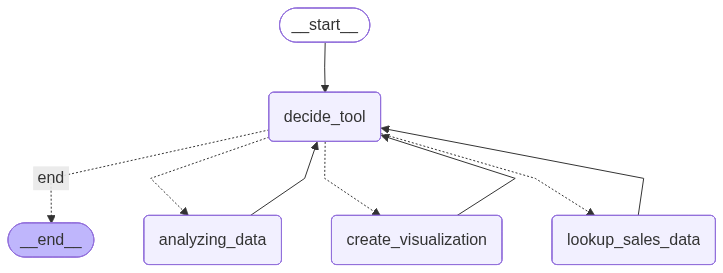

''

In [22]:
agent.draw_graph()

In [ ]:
from Agent.data_agent import SalesDataAgent

agent = SalesDataAgent(
    enable_tracing=True,
    phoenix_endpoint="http://localhost:6006/v1/traces",
    project_name="evaluating-agent",
    model="llama3.2:3b"
)
ret = agent.run("What was the most popular product SKU?")
print(ret.get("answer"))

Overriding of current TracerProvider is not allowed
Attempting to instrument while already instrumented


🔭 OpenTelemetry Tracing Details 🔭
|  Phoenix Project: evaluating-agent
|  Span Processor: SimpleSpanProcessor
|  Collector Endpoint: http://localhost:6006/v1/traces
|  Transport: HTTP + protobuf
|  Transport Headers: {}
|  
|  Using a default SpanProcessor. `add_span_processor` will overwrite this default.
|  
|  ⚠️ WARNING: It is strongly advised to use a BatchSpanProcessor in production environments.
|  
|  `register` has set this TracerProvider as the global OpenTelemetry default.
|  To disable this behavior, call `register` with `set_global_tracer_provider=False`.



In [24]:
import json
import os

In [ ]:
DATASET_FILE_PATH = 'evaluation/query_dataset.json'
if os.path.exists(DATASET_FILE_PATH):
    with open(DATASET_FILE_PATH, 'r') as f:
        dataset = json.load(f)

for i in range(len(dataset)):
    if (dataset[i].get('generated_sql') and dataset[i].get('generated_data')):
        print(f'\nSkipping question {i}/{len(dataset)} as generated results were already added.')
        continue
    ret = agent.run(dataset[i]['prompt'])
    dataset[i]['generated_sql']=ret['sql_query']
    dataset[i]['generated_data']=ret['data']

with open('evaluation/query_dataset.json', 'w') as f:
    json.dump(dataset, f, indent=2)

Running the graph...
[LangGraph] Starting LangGraph execution with tracing
Tool selected: lookup_sales_data
Generated SQL Query:
 SELECT SKU_Coded FROM sales GROUP BY SKU_Coded ORDER BY SUM(Total_Sale_Value) DESC LIMIT 1
Tool selected: analyzing_data
Data to analyze:
  SKU_Coded
   6200700
Tool selected: create_visualization
Este es el chart config: {'chart_type': 'bar', 'x_axis': 'SKU_Coded', 'y_axis': '', 'title': 'Most Popular Product SKU', 'data': ' SKU_Coded\n   6200700'}
Tool selected: end
[LangGraph] LangGraph execution completed
Running the graph...
[LangGraph] Starting LangGraph execution with tracing
Tool selected: lookup_sales_data
Generated SQL Query:
 SELECT SUM(Total_Sale_Value) FROM sales
Tool selected: analyzing_data
Data to analyze:
  sum(Total_Sale_Value)
          1.327264e+07
Tool selected: create_visualization
Este es el chart config: {'chart_type': 'bar', 'x_axis': 'Store', 'y_axis': 'Total_Sale_Value', 'title': 'Total Revenue by Store', 'data': ' sum(Total_Sale_V

In [6]:
from tqdm import tqdm

agent_questions = [
    "What was the most popular product SKU?",
    "What was the total revenue across all stores?",
    "Which store had the highest sales volume?",
    "Create a bar chart showing total sales by store",
    "What was the average transaction value?",
]

for question in tqdm(agent_questions, desc="Processing questions"):
    try:
        ret = agent.run(question)
        print("\nQ:", question)
        if ret.get("error"):
            print("Error:", ret["error"])
            continue
        answer = ret.get("answer", [])
        if answer:
            print("Analysis:\n", answer[0])
            if len(answer) > 1:
                print("\nChart code:\n", answer[1])
        else:
            print("No answer returned.")
    except Exception as e:
        print(f"Error processing question: {question}")
        print(e)
        continue

Processing questions:   0%|          | 0/5 [00:00<?, ?it/s]

Running the graph...
[LangGraph] Starting LangGraph execution with tracing


Exception while exporting Span.
Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 493, in _make_request
    conn.req

Tool selected: lookup_sales_data


Exception while exporting Span.
Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 493, in _make_request
    conn.req

Generated SQL Query:
 SELECT SKU_Coded FROM sales GROUP BY SKU_Coded ORDER BY SUM(Total_Sale_Value) DESC LIMIT 1


Exception while exporting Span.
Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 493, in _make_request
    conn.req

Tool selected: analyzing_data
Data to analyze:
  SKU_Coded
   6200700


Exception while exporting Span.
Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 493, in _make_request
    conn.req

Tool selected: create_visualization


Exception while exporting Span.
Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 493, in _make_request
    conn.req

Este es el chart config: {'chart_type': 'bar', 'x_axis': 'SKU_Coded', 'y_axis': '', 'title': 'Most Popular Product SKU', 'data': ' SKU_Coded\n   6200700'}


Exception while exporting Span.
Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/Users/simop/miniconda3/lib/python3.11/site-packages/urllib3/connectionpool.py", line 493, in _make_request
    conn.req

KeyboardInterrupt: 

In [ ]:
from langchain.globals import set_verbose
from langchain.globals import set_debug

set_debug(False)
set_verbose(False)

In [ ]:
#result = agent.run("Show me the sales in Nov 2021")
input_state = {"prompt": "Show me the sales in Nov 2021"}
result = agent.graph.invoke(input_state)

Tool selected: lookup_sales_data
Tool selected: analyzing_data


In [ ]:
result = agent.run("Show me the sales in Nov 2021")

Checking the model can run locally
Server is running locally
Ollama is running locally
Running the graph...


In [ ]:
# Run a prompt; optionally pass a visualization goal
result = agent.run("Show me the sales in Nov 2021")

# Inspect results
print("Final tool:", result.get("tool_choice"))
print("Chart config:", result.get("chart_config"))
print("\nNumber of answer steps:", len(result.get("answer", [])))
if result.get("answer"):
    print("\nAnalysis (first 500 chars):\n", result["answer"][0][:500])

# If the last answer item is plotting code, execute it to render the chart
if result.get("chart_config") and result.get("answer"):
    chart_code = result["answer"][-1]
    exec(chart_code, globals(), locals())

Running the graph...


KeyboardInterrupt: 

In [ ]:
print(agent.llm.invoke('hi'))

content='How can I assist you today?' additional_kwargs={} response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-10-26T14:55:03.8307549Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1417956800, 'load_duration': 239529800, 'prompt_eval_count': 26, 'prompt_eval_duration': 184507600, 'eval_count': 8, 'eval_duration': 976263200, 'model_name': 'llama3.2:3b'} id='run--64135ac3-7e01-4589-84d8-27debe03e542-0' usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34}
